In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime as dt
import seaborn as sns


# Import datasets

In [4]:
bidding= pd.read_csv("dataset/clicks_bidding.csv")
regular= pd.read_csv("dataset/clicks_regular.csv")
prices_competitors= pd.read_csv("dataset/prices_competitor.csv")
product_catalog= pd.read_csv("dataset/product_catalog.csv")
sales_data= pd.read_csv("dataset/sales_data.csv")
sellers_list= pd.read_csv("dataset/sellers_list.csv")
stock= pd.read_csv("dataset/stock.csv")

In [5]:
#merge dataset sales_data and product_catalog on product_id
sales_data_product_catalog = pd.merge(sales_data, product_catalog, on='product_id', how='left')


## Clicks analysis

In [6]:
#create new column with the name of the seller
bidding["seller_name"] = bidding["seller"].map(sellers_list.set_index("seller_id")["seller_name"])
regular["seller_name"] = regular["seller"].map(sellers_list.set_index("seller_id")["seller_name"])


In [7]:
bidding

,date,seller,position,price_max,price_min,price,type,product_id,seller_name
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476,F
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606,B
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285,G
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103,F
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375,G
...,...,...,...,...,...,...,...,...,...
696994,2022-01-04 14:16:13,407,1,32999.0,26490.0,27990.0,Bidding,146646,D
696995,2022-01-04 14:16:26,407,2,3973.0,2390.0,2408.0,Bidding,133928,D
696996,2022-01-04 14:18:00,24,1,34990.0,32987.0,34990.0,Bidding,140183,G
696997,2022-01-04 14:18:23,407,1,30999.0,26015.0,26190.0,Bidding,155488,D


In [8]:
#convert date of bidding and regular
bidding['date'] = pd.to_datetime(bidding['date'])
regular['date'] = pd.to_datetime(regular['date'])



In [9]:
#extract column with year for bidding and regular
bidding['year'] = bidding['date'].dt.year
regular['year'] = regular['date'].dt.year
#extract date excluding the hours minute and seconds
bidding['date_new'] = bidding['date'].dt.date
regular['date_new'] = regular['date'].dt.date


bidding

,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476,F,2021,2021-04-02
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606,B,2021,2021-04-02
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285,G,2021,2021-04-02
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103,F,2021,2021-04-02
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375,G,2021,2021-04-02
...,...,...,...,...,...,...,...,...,...,...,...
696994,2022-01-04 14:16:13,407,1,32999.0,26490.0,27990.0,Bidding,146646,D,2022,2022-01-04
696995,2022-01-04 14:16:26,407,2,3973.0,2390.0,2408.0,Bidding,133928,D,2022,2022-01-04
696996,2022-01-04 14:18:00,24,1,34990.0,32987.0,34990.0,Bidding,140183,G,2022,2022-01-04
696997,2022-01-04 14:18:23,407,1,30999.0,26015.0,26190.0,Bidding,155488,D,2022,2022-01-04


In [10]:
#clicks per date_new and seller_name
bidding_clicks = bidding.groupby(['date_new', 'seller_name']).size().reset_index(name='clicks')
regular_clicks = regular.groupby(['date_new', 'seller_name']).size().reset_index(name='clicks')

#count total number clicks per seller
bidding_clicks_total = bidding.groupby(['seller_name']).size().reset_index(name='clicks')
regular_clicks_total = regular.groupby(['seller_name']).size().reset_index(name='clicks')

bidding_clicks_total

,seller_name,clicks
0,B,15556
1,C,1009
2,D,78312
3,E,10054
4,F,43860
5,G,304332
6,H,179788
7,I,43871
8,L,20217


In [11]:
#sort values by clicks
bidding_clicks_total = bidding_clicks_total.sort_values(by=['clicks'], ascending=False)
regular_clicks_total = regular_clicks_total.sort_values(by=['clicks'], ascending=False)
bidding_clicks_total

,seller_name,clicks
5,G,304332
6,H,179788
2,D,78312
7,I,43871
4,F,43860
8,L,20217
0,B,15556
3,E,10054
1,C,1009


In [12]:
regular_clicks_total

,seller_name,clicks
5,G,588560
0,B,381710
6,H,344792
7,I,309989
2,D,196081
4,F,170712
3,E,156293
1,C,80321
8,L,24473


In [13]:
#show the number of clicks per day for each seller
bidding_clicks_amount = bidding_clicks.pivot(index='date_new', columns='seller_name', values='clicks')
regular_clicks_amount = regular_clicks.pivot(index='date_new', columns='seller_name', values='clicks')


In [14]:
bidding_clicks_amount

seller_name,B,C,D,E,F,G,H,I,L
date_new,,,,,,,,,
2021-04-02,455.0,NaN,NaN,NaN,219.0,751.0,364.0,286.0,26.0
2021-04-03,628.0,NaN,NaN,NaN,257.0,949.0,452.0,378.0,106.0
2021-04-04,548.0,NaN,NaN,NaN,214.0,891.0,434.0,375.0,101.0
2021-04-05,610.0,NaN,NaN,NaN,296.0,951.0,508.0,392.0,84.0
2021-04-06,570.0,NaN,NaN,69.0,265.0,1039.0,518.0,418.0,95.0
...,...,...,...,...,...,...,...,...,...
2021-12-31,NaN,6.0,205.0,NaN,87.0,787.0,430.0,109.0,31.0
2022-01-01,NaN,12.0,271.0,NaN,97.0,607.0,359.0,123.0,38.0
2022-01-02,NaN,18.0,364.0,NaN,115.0,755.0,403.0,204.0,81.0


In [15]:
bidding_clicks.head(15)


,date_new,seller_name,clicks
0,2021-04-02,B,455
1,2021-04-02,F,219
2,2021-04-02,G,751
3,2021-04-02,H,364
4,2021-04-02,I,286
5,2021-04-02,L,26
6,2021-04-03,B,628
7,2021-04-03,F,257
8,2021-04-03,G,949
9,2021-04-03,H,452


In [16]:
#extract for each seller when was the first day they had a click
bidding_clicks_first = bidding_clicks.groupby(['seller_name']).first().reset_index()
regular_clicks_first = regular_clicks.groupby(['seller_name']).first().reset_index()

#extract for each seller when was the last day they had a click
bidding_clicks_last = bidding_clicks.groupby(['seller_name']).last().reset_index()
regular_clicks_last = regular_clicks.groupby(['seller_name']).last().reset_index()



In [17]:
#sort first by date
bidding_clicks_first = bidding_clicks_first.sort_values(by=['date_new'], ascending=False)
regular_clicks_first = regular_clicks_first.sort_values(by=['date_new'], ascending=False)
#sort last
bidding_clicks_last = bidding_clicks_last.sort_values(by=['date_new'], ascending=True)
regular_clicks_last = regular_clicks_last.sort_values(by=['date_new'], ascending=True)


In [18]:
regular_clicks_last

,seller_name,date_new,clicks
0,B,2021-11-17,3
1,C,2022-01-04,6
2,D,2022-01-04,105
3,E,2022-01-04,145
4,F,2022-01-04,64
5,G,2022-01-04,165
6,H,2022-01-04,127
7,I,2022-01-04,206
8,L,2022-01-04,37


In [19]:
bidding_clicks_first

,seller_name,date_new,clicks
1,C,2021-11-22,20
2,D,2021-05-05,203
3,E,2021-04-06,69
0,B,2021-04-02,455
4,F,2021-04-02,219
5,G,2021-04-02,751
6,H,2021-04-02,364
7,I,2021-04-02,286
8,L,2021-04-02,26


In [20]:
#clicks per year per seller in bidding
bidding_clicks_year = bidding.groupby(['year', 'seller_name']).size().reset_index(name='clicks')
#clicks per year per seller in regular
regular_clicks_year = regular.groupby(['year', 'seller_name']).size().reset_index(name='clicks')

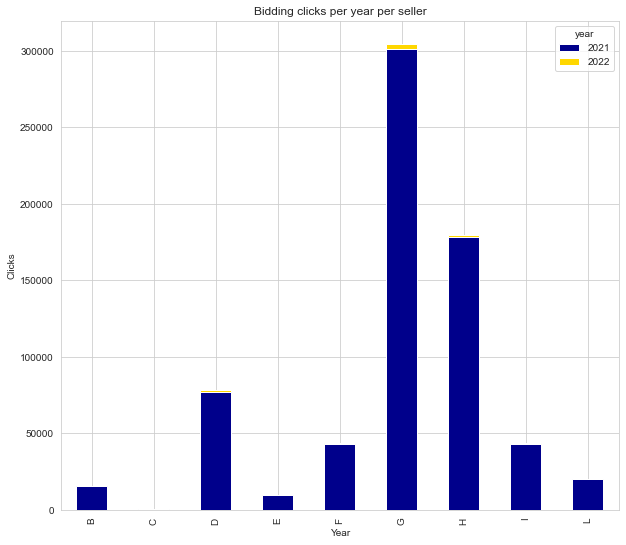

In [21]:
#stacked bar chart of bidding clicks per year per seller

sns.set_style("whitegrid")
bidding_clicks_year.pivot(index='seller_name', columns='year', values='clicks').plot(kind='bar', stacked=True, figsize=(10,9), color=['darkblue',"gold"])
plt.title('Bidding clicks per year per seller')
plt.xlabel('Year')
plt.ylabel('Clicks')
plt.show()



In [22]:
#proportion of clicks per bidding_clicks_year per seller
bidding_clicks_year['proportion'] = bidding_clicks_year.groupby('seller_name')['clicks'].apply(lambda x: x / x.sum())

#proportion of clicks per regular_clicks_year per seller
regular_clicks_year['proportion'] = regular_clicks_year.groupby('seller_name')['clicks'].apply(lambda x: x / x.sum())
regular_clicks_year


,year,seller_name,clicks,proportion
0,2020,B,173334,0.454099
1,2020,C,51362,0.639459
2,2020,D,109179,0.556806
3,2020,E,55940,0.357918
4,2020,F,87961,0.515260
5,2020,G,266575,0.452927
6,2020,H,147481,0.427739
7,2020,I,120288,0.388040
8,2021,B,208376,0.545901
9,2021,C,28883,0.359595


In [23]:
bidding_clicks_year

,year,seller_name,clicks,proportion
0,2021,B,15556,1.000000
1,2021,C,962,0.953419
2,2021,D,76987,0.983080
3,2021,E,10054,1.000000
4,2021,F,43451,0.990675
5,2021,G,301388,0.990326
6,2021,H,178329,0.991885
7,2021,I,43112,0.982699
8,2021,L,19990,0.988772
9,2022,C,47,0.046581


In [24]:
#group each seller per year
bidding_clicks_year_grouped = bidding_clicks_year.groupby(['year', 'seller_name']).sum().reset_index()
bidding_clicks_year_grouped

,year,seller_name,clicks,proportion
0,2021,B,15556,1.000000
1,2021,C,962,0.953419
2,2021,D,76987,0.983080
3,2021,E,10054,1.000000
4,2021,F,43451,0.990675
5,2021,G,301388,0.990326
6,2021,H,178329,0.991885
7,2021,I,43112,0.982699
8,2021,L,19990,0.988772
9,2022,C,47,0.046581


In [25]:
#sort bidding_clicks_year_grouped and regular_clicks_year by seller
bidding_clicks_year_grouped = bidding_clicks_year_grouped.sort_values(by=['seller_name'], ascending=True)
regular_clicks_year = regular_clicks_year.sort_values(by=['seller_name'], ascending=True)
regular_clicks_year


,year,seller_name,clicks,proportion
0,2020,B,173334,0.454099
8,2021,B,208376,0.545901
1,2020,C,51362,0.639459
17,2022,C,76,0.000946
9,2021,C,28883,0.359595
2,2020,D,109179,0.556806
18,2022,D,826,0.004213
10,2021,D,86076,0.438982
3,2020,E,55940,0.357918
19,2022,E,1325,0.008478


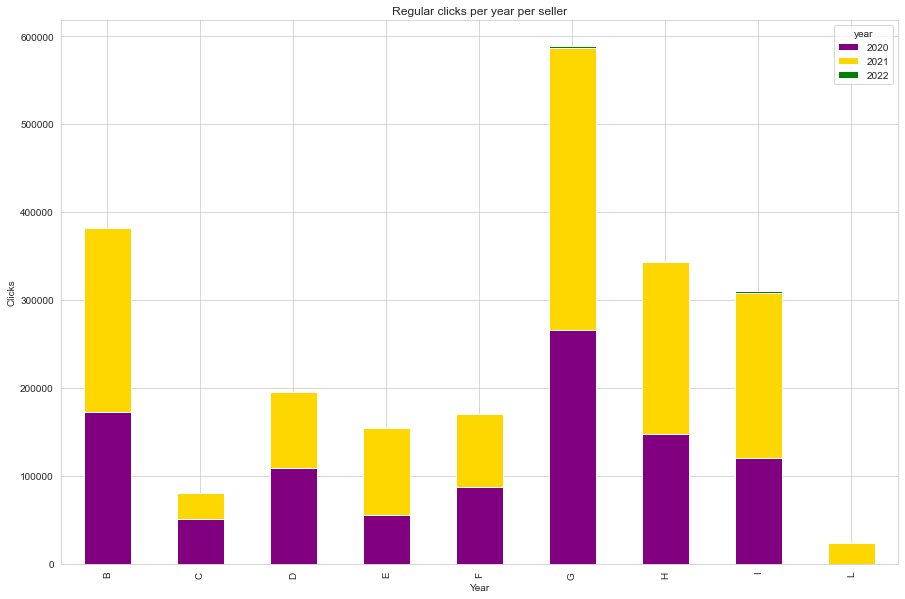

In [26]:
#stacked bar chart of regular clicks per year per seller
regular_clicks_year.pivot(index='seller_name', columns='year', values='clicks').plot(kind='bar', stacked=True, figsize=(15,10), color=["purple","gold", "green"])
plt.title('Regular clicks per year per seller')
plt.xlabel('Year')
plt.ylabel('Clicks')
plt.show()


In [27]:
reg=regular_clicks_year.pivot(index='seller_name', columns='year', values='clicks')
#fill na in ge with 0
reg.fillna(0, inplace=True)
reg

year,2020,2021,2022
seller_name,,,
B,173334.0,208376.0,0.0
C,51362.0,28883.0,76.0
D,109179.0,86076.0,826.0
E,55940.0,99028.0,1325.0
F,87961.0,82227.0,524.0
G,266575.0,320340.0,1645.0
H,147481.0,195843.0,1468.0
I,120288.0,187577.0,2124.0
L,0.0,24158.0,315.0


In [28]:
#sales data product catalog date to csv
sales_data_product_catalog.to_csv('sales_data_product_catalog.csv', index=False)


In [29]:
#filter regular only for 2021
regular_2021 = regular[regular['year'] == 2021]
#append regular_2021 to bidding
clicks = bidding.append(regular_2021, ignore_index=True)
clicks


,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new
0,2021-04-02 11:48:02,48,1.0,25990.0,21990.0,25990.0,Bidding,140476,F,2021,2021-04-02
1,2021-04-02 11:48:04,180,1.0,51990.0,42989.0,45490.0,Bidding,123606,B,2021,2021-04-02
2,2021-04-02 11:48:15,24,1.0,53990.0,48789.0,38790.0,Bidding,157285,G,2021,2021-04-02
3,2021-04-02 11:48:16,48,1.0,10699.0,8450.0,8990.0,Bidding,113103,F,2021,2021-04-02
4,2021-04-02 11:48:59,24,1.0,67199.0,67199.0,55990.0,Bidding,151375,G,2021,2021-04-02
...,...,...,...,...,...,...,...,...,...,...,...
1929502,2021-12-31 23:50:47,24,2.0,11990.0,7248.0,8990.0,Regular,136032,G,2021,2021-12-31
1929503,2021-12-31 23:50:50,24,2.0,11990.0,7248.0,8990.0,Regular,136032,G,2021,2021-12-31
1929504,2021-12-31 23:54:38,24,4.0,17999.0,14990.0,14990.0,Regular,144294,G,2021,2021-12-31
1929505,2021-12-31 23:54:40,48,3.0,5490.0,5490.0,5490.0,Regular,156758,F,2021,2021-12-31


In [30]:
#number of clicks per position in bidding
bidding['position'].value_counts()


1    362641
2    221188
3    113170
Name: position, dtype: int64

In [31]:
#for each seller calculate clicks per type
clicks_per_type = clicks.groupby(['seller_name', 'type']).size().reset_index(name='clicks')
clicks_per_type

,seller_name,type,clicks
0,B,Bidding,15556
1,B,Regular,208376
2,C,Bidding,1009
3,C,Regular,28883
4,D,Bidding,78312
5,D,Regular,86076
6,E,Bidding,10054
7,E,Regular,99028
8,F,Bidding,43860
9,F,Regular,82227


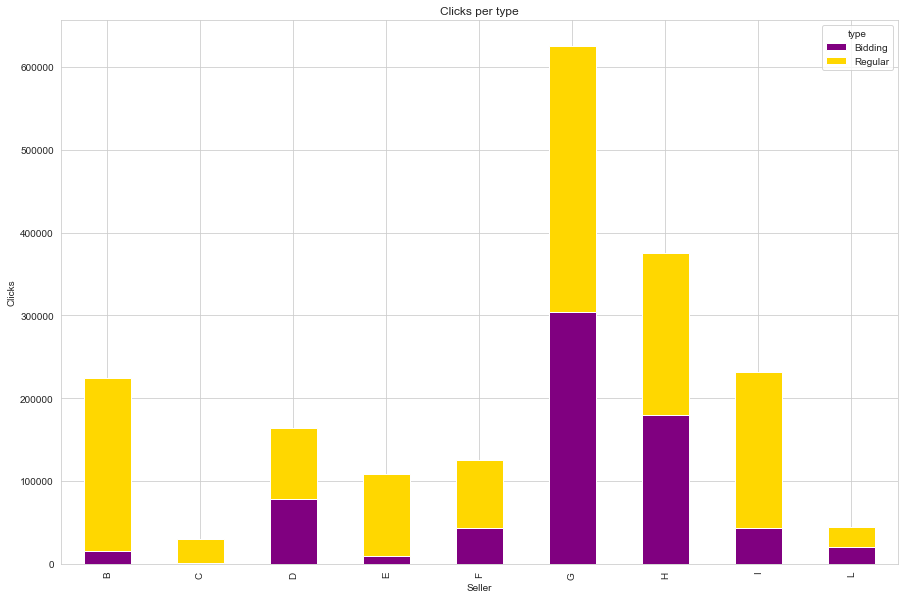

In [32]:
#bar plot stacked of clicks per type
sns.set_style("whitegrid")
clicks_per_type.pivot(index='seller_name', columns='type', values='clicks').plot(kind='bar', stacked=True, figsize=(15,10), color=["purple","gold","green"])
plt.title('Clicks per type')
plt.xlabel('Seller')
plt.ylabel('Clicks')
plt.show()


In [33]:
#number of clicks per position in bidding
bidding['position'].value_counts()

1    362641
2    221188
3    113170
Name: position, dtype: int64

In [34]:
#position for each seller name
bid_pos =bidding.groupby(['seller_name'])['position'].value_counts()
bid_pos


seller_name  position
B            1             6370
             2             5270
             3             3916
C            2              408
             3              338
             1              263
D            1            66613
             2             7518
             3             4181
E            1             5680
             2             2671
             3             1703
F            1            27172
             2             8839
             3             7849
G            1           153336
             2           110257
             3            40739
H            1            75579
             2            67316
             3            36893
I            1            16315
             2            14049
             3            13507
L            1            11313
             2             4860
             3             4044
Name: position, dtype: int64

In [35]:
bidding_prop_position = bid_pos.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
bidding_prop_position

seller_name  position
B            1           40.948830
             2           33.877603
             3           25.173566
C            2           40.436075
             3           33.498513
             1           26.065411
D            1           85.061038
             2            9.600061
             3            5.338901
E            1           56.494927
             2           26.566541
             3           16.938532
F            1           61.951664
             2           20.152759
             3           17.895577
G            1           50.384449
             2           36.229184
             3           13.386368
H            1           42.037845
             2           37.441876
             3           20.520279
I            1           37.188576
             2           32.023432
             3           30.787992
L            1           55.957857
             2           24.039175
             3           20.002968
Name: position, dtype: float64

In [36]:
#position for each seller name
pos_reg =regular.groupby(['seller_name'])['position'].value_counts()
pos_reg


seller_name  position
B            1.0         52083
             2.0         36695
             3.0         28076
             4.0         19270
             5.0         14450
                         ...  
L            27.0           20
             104.0           6
             28.0            3
             29.0            2
             1010.0          2
Name: position, Length: 296, dtype: int64

In [37]:
#calculate proportions of clicks per position for each seller
regular_prop_position = pos_reg.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


In [38]:
regular_prop_position.head(50)

seller_name  position
B            1.0         26.911550
             2.0         18.960493
             3.0         14.507012
             4.0          9.956907
             5.0          7.466388
             6.0          5.411452
             7.0          4.048901
             8.0          3.103847
             9.0          2.483285
             10.0         1.866855
             11.0         1.439540
             12.0         1.028760
             13.0         0.776091
             14.0         0.499654
             15.0         0.385979
             16.0         0.345676
             17.0         0.205132
             18.0         0.149844
             19.0         0.123493
             20.0         0.098174
             21.0         0.068722
             0.0          0.061488
             22.0         0.037203
             23.0         0.025835
             25.0         0.011368
             24.0         0.007751
             26.0         0.005684
             27.0         0.00155

In [39]:
#value counts of position in regular
regular['position'].value_counts()


1.0       464839
2.0       228416
3.0       143204
4.0        82809
5.0        56029
6.0        40207
7.0        30517
8.0        23588
9.0        18110
10.0       14537
11.0       11639
12.0        9476
13.0        7561
14.0        5985
15.0        4882
16.0        4062
17.0        3284
18.0        2574
19.0        2143
20.0        1571
21.0        1183
22.0         788
0.0          545
23.0         472
24.0         308
25.0         204
26.0         131
27.0          74
28.0          41
29.0          18
30.0           9
1019.0         8
104.0          6
31.0           6
1016.0         5
106.0          4
1011.0         4
1014.0         4
1013.0         3
1021.0         3
1025.0         3
1024.0         3
1010.0         2
32.0           2
1012.0         2
1017.0         2
1018.0         1
109.0          1
1020.0         1
1026.0         1
Name: position, dtype: int64

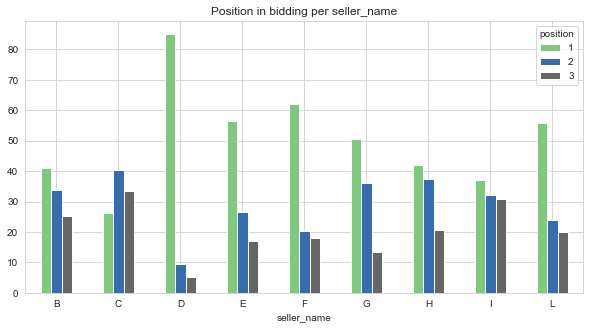

In [40]:
#stacked barplot of b dodge

bidding_prop_position.unstack().plot(kind='bar', stacked=False, figsize=(10, 5), rot=0, title='Position in bidding per seller_name', colormap='Accent')
plt.show()  


In [41]:
#average price per seller in bidding
bidding.groupby(['seller_name'])['price'].mean().sort_values(ascending=False)

seller_name
E    40098.293018
G    27939.964752
D    27335.200544
C    25546.462834
B    25273.226601
H    25255.588610
I    24273.784425
F    23884.341746
L    22485.264926
Name: price, dtype: float64

In [42]:
#plot price fluctuation per seller
#convert bidding date to datetime
bidding['date'] = pd.to_datetime(bidding['date'])

In [43]:
#filter seller 24
df3 = clicks[clicks['seller'] == 24]


# Price, Demand, Profit analysis


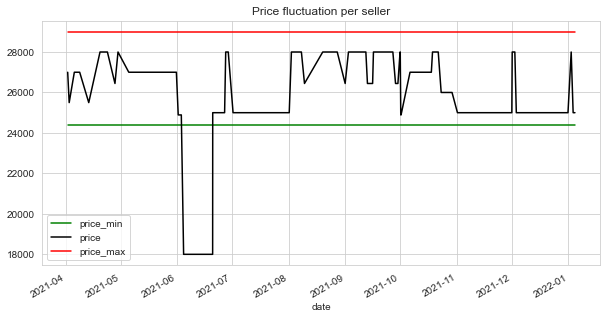

In [44]:
#set white background
sns.set_style("whitegrid")

# line plot for product 122363 price_min, price_max, price in df3
from turtle import color

df3[df3['product_id'] == 162101].plot.line(x='date', y=['price_min', 'price', "price_max"],color=["green", "black", "red"], figsize=(10, 5), title='Price fluctuation per seller')

plt.show()

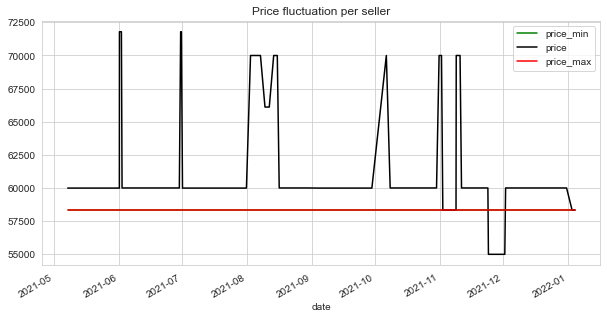

In [45]:
# line plot for product 122363 price_min, price_max, price in df3
df3[df3['product_id'] == 163385].plot.line(x='date', y=['price_min', 'price', "price_max"], figsize=(10, 5), title='Price fluctuation per seller', color=["green", "black", "red"])
plt.show()

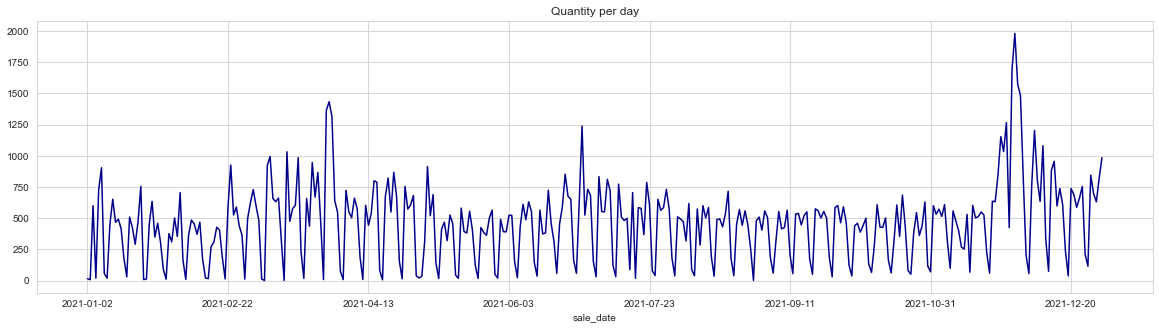

In [46]:
#line plot of quantity per day in sales_data_product_catalog
sales_data_product_catalog.groupby(['sale_date'])['quantity'].sum().plot.line(figsize=(20, 5), title='Quantity per day', color="darkblue")
plt.show()


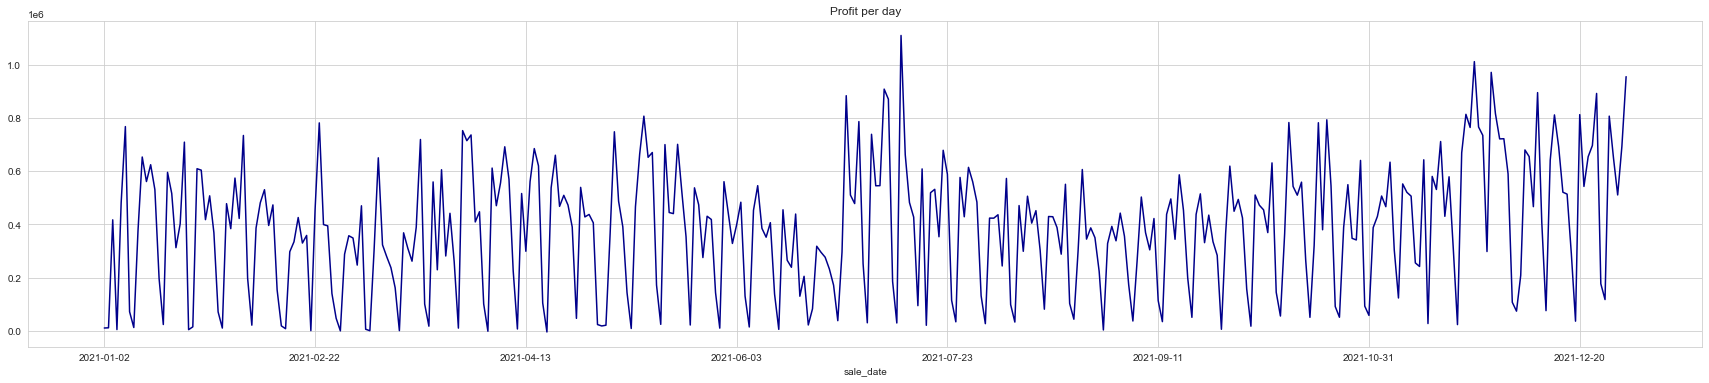

In [47]:
sales_data_product_catalog["profit"]= sales_data_product_catalog["sales_price"]*sales_data_product_catalog["quantity"]-sales_data_product_catalog["purchase_price"]*sales_data_product_catalog["quantity"]
#line plot of sales_price per day in sales_data_product_catalog
sales_data_product_catalog.groupby(['sale_date'])['profit'].sum().plot.line(figsize=(30, 6), title='Profit per day', color="darkblue")
plt.show()

In [48]:
#calculate profit
sales_data_product_catalog["profit"]= sales_data_product_catalog["sales_price"]*sales_data_product_catalog["quantity"]-sales_data_product_catalog["purchase_price"]*sales_data_product_catalog["quantity"]

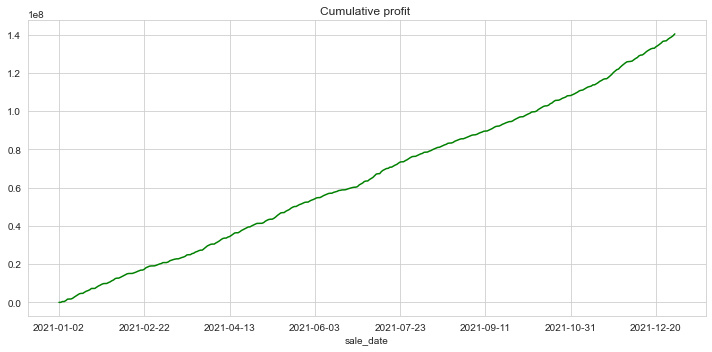

In [49]:
#plot cumulative profit per day

sns.set_style("whitegrid")
sales_data_product_catalog.groupby(['sale_date'])['profit'].sum().cumsum().plot.line(figsize=(10, 5), title='Cumulative profit ', color='green')
plt.tight_layout()
plt.show()

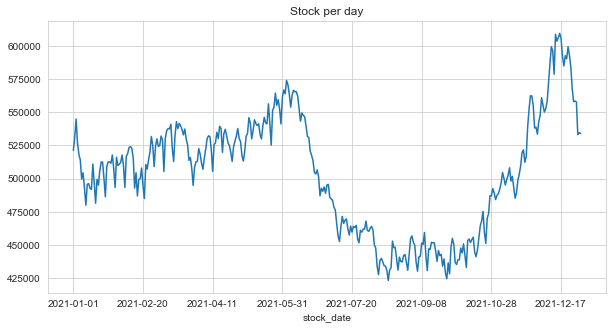

In [50]:
#line plot on stock per day
stock.groupby(['stock_date'])['total_stock'].sum().plot.line(figsize=(10, 5), title='Stock per day')
plt.show()

In [51]:
#PLOT PROFIT PER MONTH
sales_data_product_catalog['sale_date'] = pd.to_datetime(sales_data_product_catalog['sale_date'])
sales_data_product_catalog['month'] = sales_data_product_catalog['sale_date'].dt.month
sales_data_product_catalog['year'] = sales_data_product_catalog['sale_date'].dt.year
sales_data_product_catalog['month_year'] = sales_data_product_catalog['sale_date'].dt.to_period('M')
sales_data_product_catalog['profit']= sales_data_product_catalog["sales_price"]*sales_data_product_catalog["quantity"]-sales_data_product_catalog["purchase_price"]*sales_data_product_catalog["quantity"]


In [52]:
sales_data_product_catalog


,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,profit,month,year,month_year
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,2180,613,732,691,1823,582.6000,1,2021,2021-01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,2259,2015,493,522,1709,491.3000,1,2021,2021-01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,2259,1714,724,253,1435,47.0000,1,2021,2021-01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,2180,613,732,691,2117,558.5976,1,2021,2021-01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,2180,613,2275,691,2820,792.6000,1,2021,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,1776,1376,694,731,2279,535.5000,12,2021,2021-12
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,1776,1376,694,576,2606,20.0000,12,2021,2021-12
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,1375,2519,2668,455,3045,558.0000,12,2021,2021-12
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,1354,1498,1854,516,3512,508.0000,12,2021,2021-12


In [53]:
#calculate proportion of time seller 24 price higher than price_max
df3['price_higher'] = np.where(df3['price'] > df3['price_max'], 1, 0)
df3['price_higher'].mean()




<ipython-input-53-ee7e466b70df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_higher'] = np.where(df3['price'] > df3['price_max'], 1, 0)


0.05988102556221505

In [54]:
#calculate proportion of time seller 24 price lower than price_min
df3['price_lower'] = np.where(df3['price'] < df3['price_min'], 1, 0)
df3['price_lower'].mean()



<ipython-input-54-e032be8fd5a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_lower'] = np.where(df3['price'] < df3['price_min'], 1, 0)


0.45657080836022745

In [55]:
#extract month from date_new
df3['month'] = df3['date'].dt.month


<ipython-input-55-e90a7117bf2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3['date'].dt.month


In [56]:
#filter 2021 for regular and seller 24
df4 = regular[regular['seller'] == 24]
df4


,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new
5,2020-01-01 00:42:57,24,NaN,12999.0,9491.0,NaN,Regular,132634,G,2020,2020-01-01
6,2020-01-01 00:44:21,24,NaN,10890.0,9290.0,NaN,Regular,110429,G,2020,2020-01-01
7,2020-01-01 00:46:46,24,NaN,31690.0,28999.0,NaN,Regular,141943,G,2020,2020-01-01
8,2020-01-01 00:56:15,24,NaN,43199.0,43199.0,NaN,Regular,128665,G,2020,2020-01-01
9,2020-01-01 00:57:23,24,NaN,59499.0,47290.0,NaN,Regular,122464,G,2020,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2252871,2022-01-04 11:37:10,24,1.0,45499.0,45499.0,45499.0,Regular,156411,G,2022,2022-01-04
2252874,2022-01-04 11:39:08,24,15.0,23990.0,18799.0,23990.0,Regular,177918,G,2022,2022-01-04
2252907,2022-01-04 11:53:03,24,3.0,23500.0,22990.0,22990.0,Regular,140204,G,2022,2022-01-04
2252915,2022-01-04 11:55:01,24,2.0,29990.0,29990.0,29990.0,Regular,157704,G,2022,2022-01-04


In [57]:
df4 = df4[df4['date'].dt.year == 2021]
df4['month'] = df4['date'].dt.month

<ipython-input-57-f760e5bcb2a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = df4['date'].dt.month


In [58]:
df4['price_lower'] = np.where(df4['price'] < df4['price_min'], 1, 0)
df4['price_higher'] = np.where(df4['price'] > df4['price_max'], 1,0)
print(df4['price_lower'].mean())
print(df4['price_higher'].mean())




0.4878004620091153
0.06524630080539427


<ipython-input-58-e295ec5543ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_lower'] = np.where(df4['price'] < df4['price_min'], 1, 0)
<ipython-input-58-e295ec5543ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_higher'] = np.where(df4['price'] > df4['price_max'], 1,0)


In [59]:
#calculate time between clicks for each seller in bidding based on date in seconds
bidding['date_diff'] = bidding.groupby(['seller'])['date'].diff()
bidding['date_diff'] = bidding['date_diff'].dt.total_seconds()
bidding


,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new,date_diff
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476,F,2021,2021-04-02,NaN
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606,B,2021,2021-04-02,NaN
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285,G,2021,2021-04-02,NaN
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103,F,2021,2021-04-02,14.0
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375,G,2021,2021-04-02,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
696994,2022-01-04 14:16:13,407,1,32999.0,26490.0,27990.0,Bidding,146646,D,2022,2022-01-04,95.0
696995,2022-01-04 14:16:26,407,2,3973.0,2390.0,2408.0,Bidding,133928,D,2022,2022-01-04,13.0
696996,2022-01-04 14:18:00,24,1,34990.0,32987.0,34990.0,Bidding,140183,G,2022,2022-01-04,275.0
696997,2022-01-04 14:18:23,407,1,30999.0,26015.0,26190.0,Bidding,155488,D,2022,2022-01-04,117.0


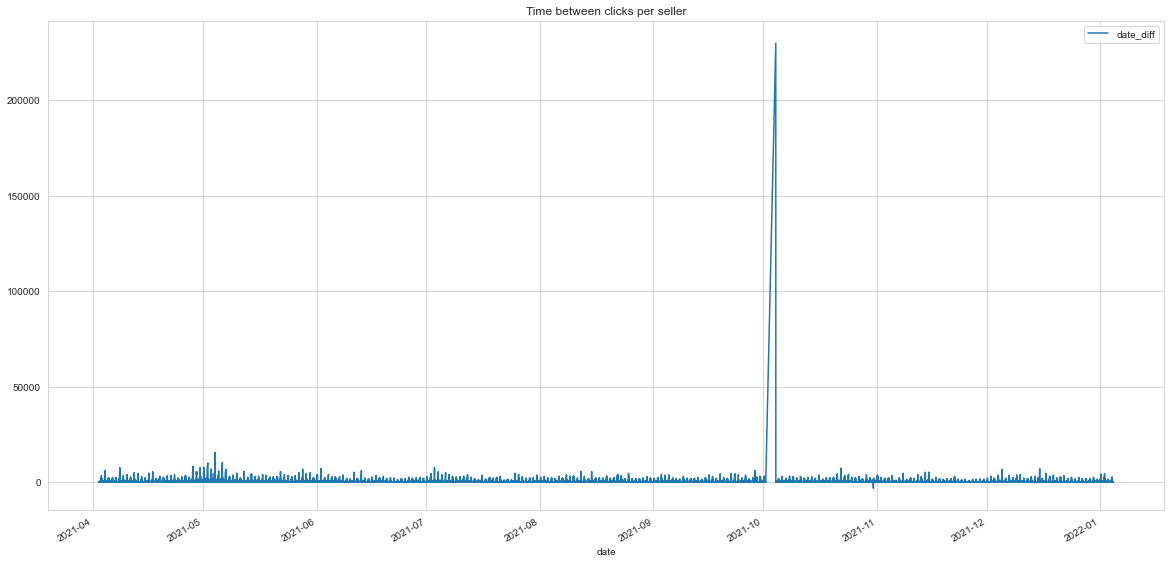

In [60]:
#plot line chart date_diff for seller 24 in bidding
bidding[bidding['seller'] == 24].plot.line(x='date', y=['date_diff'], figsize=(20, 10), title='Time between clicks per seller')
plt.show()


In [61]:
#calculate time between clicks for each seller in regular based on date
regular.sort_values(by=['date'], inplace=True)
regular


,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new
0,2020-01-01 00:28:01,48,NaN,5290.0,5290.0,NaN,Regular,148875,F,2020,2020-01-01
1,2020-01-01 00:29:40,48,NaN,11787.0,9990.0,NaN,Regular,104538,F,2020,2020-01-01
2,2020-01-01 00:30:39,23,NaN,16217.0,16217.0,NaN,Regular,108283,C,2020,2020-01-01
3,2020-01-01 00:42:23,48,NaN,7399.0,6398.0,NaN,Regular,144718,F,2020,2020-01-01
4,2020-01-01 00:42:51,407,NaN,3343.0,2299.0,NaN,Regular,144776,D,2020,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2252926,2022-01-04 11:58:42,48,1.0,3190.0,2999.0,2999.0,Regular,182682,F,2022,2022-01-04
2252927,2022-01-04 11:59:52,41,1.0,29990.0,24442.0,24442.0,Regular,141881,I,2022,2022-01-04
2252928,2022-01-04 11:59:54,41,3.0,3725.0,1990.0,2195.0,Regular,147728,I,2022,2022-01-04
2252929,2022-01-04 12:00:00,41,3.0,62990.0,52989.0,53051.0,Regular,128385,I,2022,2022-01-04


In [62]:
regular['date_diff'] = regular.groupby(['seller'])['date'].diff()
regular['date_diff'] = regular['date_diff'].dt.total_seconds()
regular


,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new,date_diff
0,2020-01-01 00:28:01,48,NaN,5290.0,5290.0,NaN,Regular,148875,F,2020,2020-01-01,NaN
1,2020-01-01 00:29:40,48,NaN,11787.0,9990.0,NaN,Regular,104538,F,2020,2020-01-01,99.0
2,2020-01-01 00:30:39,23,NaN,16217.0,16217.0,NaN,Regular,108283,C,2020,2020-01-01,NaN
3,2020-01-01 00:42:23,48,NaN,7399.0,6398.0,NaN,Regular,144718,F,2020,2020-01-01,763.0
4,2020-01-01 00:42:51,407,NaN,3343.0,2299.0,NaN,Regular,144776,D,2020,2020-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2252926,2022-01-04 11:58:42,48,1.0,3190.0,2999.0,2999.0,Regular,182682,F,2022,2022-01-04,168.0
2252927,2022-01-04 11:59:52,41,1.0,29990.0,24442.0,24442.0,Regular,141881,I,2022,2022-01-04,76.0
2252928,2022-01-04 11:59:54,41,3.0,3725.0,1990.0,2195.0,Regular,147728,I,2022,2022-01-04,2.0
2252929,2022-01-04 12:00:00,41,3.0,62990.0,52989.0,53051.0,Regular,128385,I,2022,2022-01-04,6.0


In [63]:

#sorter by time between clicks in bidding per seller
bidding.groupby(['seller_name'])['date_diff'].mean().sort_values(ascending=True)


seller_name
G      78.670313
H     133.164044
B     211.722919
D     269.429046
I     545.723547
F     545.878383
E    1032.733612
L    1182.956124
C    3672.598214
Name: date_diff, dtype: float64

In [64]:
#sorter by time between clicks in regular per seller
regular.groupby(['seller_name'])['date_diff'].mean().sort_values(ascending=True)

seller_name
G     107.819340
B     131.793408
H     184.044958
I     204.707876
D     323.633032
F     371.733755
E     405.852424
C     790.069671
L    1034.678612
Name: date_diff, dtype: float64

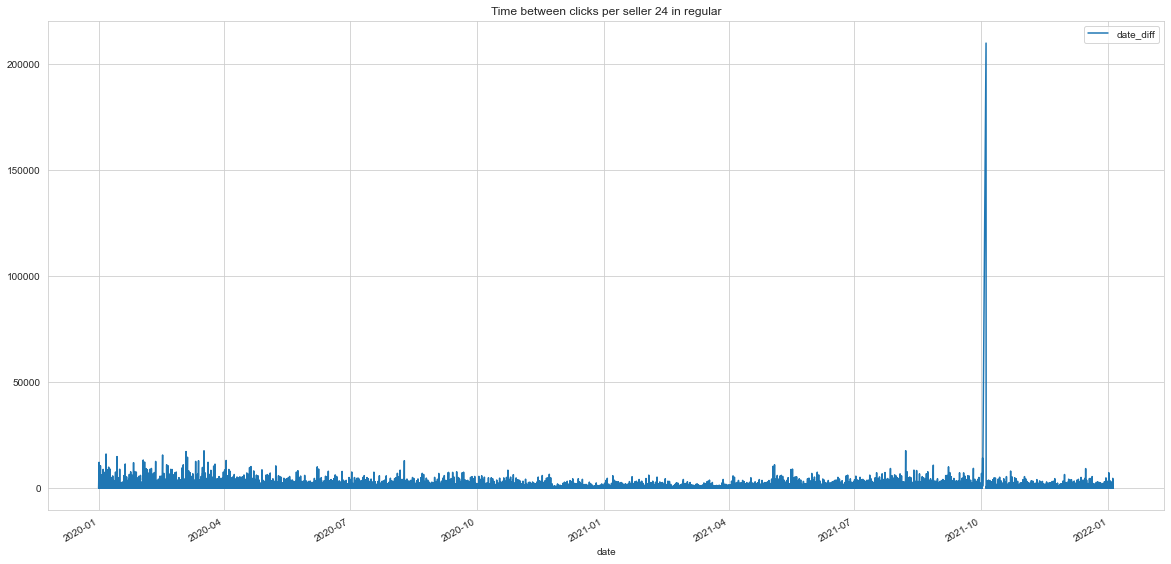

In [65]:
#line chart of seller 24 date diff in regular
regular[regular['seller'] == 24].plot.line(x='date', y=['date_diff'], figsize=(20, 10), title='Time between clicks per seller 24 in regular')
plt.show()



In [66]:
sales_data_product_catalog

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,profit,month,year,month_year
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,2180,613,732,691,1823,582.6000,1,2021,2021-01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,2259,2015,493,522,1709,491.3000,1,2021,2021-01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,2259,1714,724,253,1435,47.0000,1,2021,2021-01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,2180,613,732,691,2117,558.5976,1,2021,2021-01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,2180,613,2275,691,2820,792.6000,1,2021,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,1776,1376,694,731,2279,535.5000,12,2021,2021-12
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,1776,1376,694,576,2606,20.0000,12,2021,2021-12
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,1375,2519,2668,455,3045,558.0000,12,2021,2021-12
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,1354,1498,1854,516,3512,508.0000,12,2021,2021-12


In [67]:
#calculate quantity per product in sales_data_product_catalog per month
month_demand= sales_data_product_catalog.reset_index().pivot_table(values="quantity", index="product_id", columns="month", aggfunc='sum')

In [68]:
month_demand.head(60)

month,1,2,3,4,5,6,7,8,9,10,11,12
product_id,,,,,,,,,,,,
100043,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
100044,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
100052,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
100070,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,3.0,1.0,NaN,1.0
100078,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,4.0,2.0
100083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN
100108,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100114,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,3.0,NaN
100115,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0


In [69]:
#product sold more in june in sales_data_product_catalog
month_demand[6].sort_values(ascending=False).head(10)


product_id
112582    244.0
106100    165.0
162101    132.0
162102    117.0
151293    111.0
164725    111.0
124455    100.0
150667     90.0
157449     74.0
147182     71.0
Name: 6, dtype: float64

In [70]:
#product sold more in july in sales_data_product_catalog
month_demand[7].sort_values(ascending=False).head(10)

product_id
112582    311.0
160649    184.0
160654    147.0
147183    132.0
147185    115.0
161350    113.0
160651    113.0
151462    100.0
106100     94.0
148210     83.0
Name: 7, dtype: float64

In [71]:
#product sold less in june in sales_data_product_catalog
month_demand[6].sort_values(ascending=True).head(10)

product_id
165482    1.0
134140    1.0
154569    1.0
134004    1.0
133985    1.0
133972    1.0
133963    1.0
133941    1.0
133933    1.0
154605    1.0
Name: 6, dtype: float64

In [72]:
#product sold less in july in sales_data_product_catalog
month_demand[7].sort_values(ascending=True).head(10)

product_id
100044    1.0
146788    1.0
146787    1.0
146686    1.0
146651    1.0
146637    1.0
146300    1.0
146299    1.0
146267    1.0
146255    1.0
Name: 7, dtype: float64

In [73]:
#correlation between quantity and profit in june for most sold products
sales_data_product_catalog[sales_data_product_catalog['product_id'].isin(month_demand[6].sort_values(ascending=False).head(10).index)].groupby(['product_id'])['quantity', 'profit'].corr()


<ipython-input-73-0a73f4ced291>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data_product_catalog[sales_data_product_catalog['product_id'].isin(month_demand[6].sort_values(ascending=False).head(10).index)].groupby(['product_id'])['quantity', 'profit'].corr()


quantity    profit
product_id                             
106100     quantity  1.000000  0.617070
           profit    0.617070  1.000000
112582     quantity  1.000000 -0.874376
           profit   -0.874376  1.000000
124455     quantity  1.000000 -0.245621
           profit   -0.245621  1.000000
147182     quantity  1.000000  0.988307
           profit    0.988307  1.000000
150667     quantity  1.000000  0.991629
           profit    0.991629  1.000000
151293     quantity  1.000000  0.984053
           profit    0.984053  1.000000
157449     quantity  1.000000 -0.618766
           profit   -0.618766  1.000000
162101     quantity  1.000000 -0.940204
           profit   -0.940204  1.000000
162102     quantity  1.000000 -0.879994
           profit   -0.879994  1.000000
164725     quantity  1.000000  0.631057
           profit    0.631057  1.000000

In [74]:
#extract weekday from sales_data_product_catalog
sales_data_product_catalog['weekday'] = sales_data_product_catalog['sale_date'].dt.weekday
sales_data_product_catalog

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,profit,month,year,month_year,weekday
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,2180,613,732,691,1823,582.6000,1,2021,2021-01,5
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,2259,2015,493,522,1709,491.3000,1,2021,2021-01,5
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,2259,1714,724,253,1435,47.0000,1,2021,2021-01,5
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,2180,613,732,691,2117,558.5976,1,2021,2021-01,5
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,2180,613,2275,691,2820,792.6000,1,2021,2021-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,1776,1376,694,731,2279,535.5000,12,2021,2021-12,4
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,1776,1376,694,576,2606,20.0000,12,2021,2021-12,4
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,1375,2519,2668,455,3045,558.0000,12,2021,2021-12,4
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,1354,1498,1854,516,3512,508.0000,12,2021,2021-12,4


In [75]:
#calculate revenue sales_data_product_catalog
sales_data_product_catalog['revenue'] = sales_data_product_catalog['sales_price']*sales_data_product_catalog['quantity']
sales_data_product_catalog


,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,profit,month,year,month_year,weekday,revenue
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,2180,613,732,691,1823,582.6000,1,2021,2021-01,5,2082.0
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,2259,2015,493,522,1709,491.3000,1,2021,2021-01,5,3325.0
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,2259,1714,724,253,1435,47.0000,1,2021,2021-01,5,1907.0
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,2180,613,732,691,2117,558.5976,1,2021,2021-01,5,4158.0
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,2180,613,2275,691,2820,792.6000,1,2021,2021-01,5,4992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,1776,1376,694,731,2279,535.5000,12,2021,2021-12,4,5484.0
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,1776,1376,694,576,2606,20.0000,12,2021,2021-12,4,1658.0
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,1375,2519,2668,455,3045,558.0000,12,2021,2021-12,4,4158.0
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,1354,1498,1854,516,3512,508.0000,12,2021,2021-12,4,2158.0


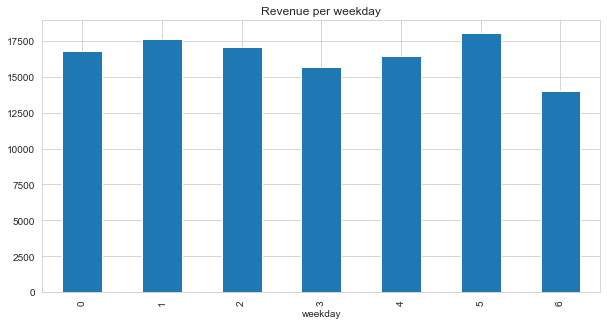

In [76]:
#barplot of revenue per weekday
sales_data_product_catalog.groupby(['weekday'])['revenue'].mean().plot.bar(figsize=(10, 5), title='Revenue per weekday')
plt.show()

In [77]:
sales_data_product_catalog.groupby(['weekday'])['revenue'].sum()

weekday
0    365466118.0
1    391387198.5
2    357007762.5
3    346221556.0
4    362058521.5
5    148684003.5
6     26513387.0
Name: revenue, dtype: float64

In [78]:
sales_data_product_catalog.groupby(['weekday'])['profit'].mean()

weekday
0    1150.729416
1    1220.101902
2    1189.515043
3    1120.700145
4    1201.031271
5    1266.015724
6     929.122322
Name: profit, dtype: float64

In [79]:
sales_data_product_catalog.groupby(['weekday'])['quantity'].sum()

weekday
0    30693
1    31542
2    28875
3    30896
4    30679
5    10546
6     2122
Name: quantity, dtype: int64

In [80]:
sales_data_product_catalog.groupby(['weekday'])['quantity'].sum()

weekday
0    30693
1    31542
2    28875
3    30896
4    30679
5    10546
6     2122
Name: quantity, dtype: int64

In [81]:
#in bidding create new column, -1 if price is lower than price_min, 1 if price is higher than price_max, 0 if price is between price_min and price_max
bidding['range'] = np.where(bidding['price'] < bidding['price_min'], -1, np.where(bidding['price'] > bidding['price_max'], 1, 0))
bidding

,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new,date_diff,range
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476,F,2021,2021-04-02,NaN,0
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606,B,2021,2021-04-02,NaN,0
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285,G,2021,2021-04-02,NaN,-1
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103,F,2021,2021-04-02,14.0,0
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375,G,2021,2021-04-02,44.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696994,2022-01-04 14:16:13,407,1,32999.0,26490.0,27990.0,Bidding,146646,D,2022,2022-01-04,95.0,0
696995,2022-01-04 14:16:26,407,2,3973.0,2390.0,2408.0,Bidding,133928,D,2022,2022-01-04,13.0,0
696996,2022-01-04 14:18:00,24,1,34990.0,32987.0,34990.0,Bidding,140183,G,2022,2022-01-04,275.0,0
696997,2022-01-04 14:18:23,407,1,30999.0,26015.0,26190.0,Bidding,155488,D,2022,2022-01-04,117.0,0


In [82]:
#in regular create new column [range], -1 if price is lower than price_min, 1 if price is higher than price_max, 0 if price is between price_min and price_max
regular['range'] = np.where(regular['price'] < regular['price_min'], -1, np.where(regular['price'] > regular['price_max'], 1, 0))
regular

,date,seller,position,price_max,price_min,price,type,product_id,seller_name,year,date_new,date_diff,range
0,2020-01-01 00:28:01,48,NaN,5290.0,5290.0,NaN,Regular,148875,F,2020,2020-01-01,NaN,0
1,2020-01-01 00:29:40,48,NaN,11787.0,9990.0,NaN,Regular,104538,F,2020,2020-01-01,99.0,0
2,2020-01-01 00:30:39,23,NaN,16217.0,16217.0,NaN,Regular,108283,C,2020,2020-01-01,NaN,0
3,2020-01-01 00:42:23,48,NaN,7399.0,6398.0,NaN,Regular,144718,F,2020,2020-01-01,763.0,0
4,2020-01-01 00:42:51,407,NaN,3343.0,2299.0,NaN,Regular,144776,D,2020,2020-01-01,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252926,2022-01-04 11:58:42,48,1.0,3190.0,2999.0,2999.0,Regular,182682,F,2022,2022-01-04,168.0,0
2252927,2022-01-04 11:59:52,41,1.0,29990.0,24442.0,24442.0,Regular,141881,I,2022,2022-01-04,76.0,0
2252928,2022-01-04 11:59:54,41,3.0,3725.0,1990.0,2195.0,Regular,147728,I,2022,2022-01-04,2.0,0
2252929,2022-01-04 12:00:00,41,3.0,62990.0,52989.0,53051.0,Regular,128385,I,2022,2022-01-04,6.0,0


In [83]:
#for each seller count range is 1, 0, -1
bidding.groupby(['seller'])['range'].value_counts()
#calculate proportion of range is 1, 0, -1
bidding.groupby(['seller'])['range'].value_counts(normalize=True)


seller  range
23       0       0.668979
        -1       0.305253
         1       0.025768
24       0       0.522068
        -1       0.423698
         1       0.054234
26       0       0.534719
        -1       0.411362
         1       0.053919
41       0       0.504365
        -1       0.444006
         1       0.051629
48      -1       0.503306
         0       0.444004
         1       0.052690
180      0       0.513435
        -1       0.390653
         1       0.095912
188     -1       0.627710
         0       0.315894
         1       0.056395
407     -1       0.557194
         0       0.428210
         1       0.014595
490      0       0.557452
        -1       0.410842
         1       0.031706
Name: range, dtype: float64

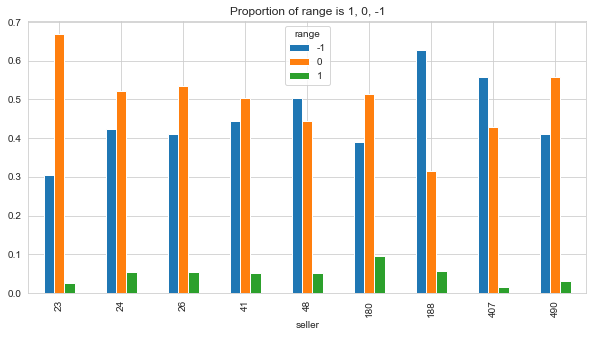

In [84]:
#bar plot of proportion of range is 1, 0, -1
bidding.groupby(['seller'])['range'].value_counts(normalize=True).unstack().plot.bar(figsize=(10, 5), title='Proportion of range is 1, 0, -1')
plt.show()

In [85]:
#for each seller in regular count range is 1, 0, -1
regular.groupby(['seller_name'])['range'].value_counts()
#calculate proportion of range is 1, 0, -1
regular.groupby(['seller_name'])['range'].value_counts(normalize=True)


seller_name  range
B             0       0.699397
             -1       0.271169
              1       0.029433
C             0       0.816947
             -1       0.157082
              1       0.025971
D             0       0.734946
             -1       0.254737
              1       0.010317
E             0       0.668322
             -1       0.307487
              1       0.024192
F             0       0.724923
             -1       0.247411
              1       0.027666
G             0       0.698819
             -1       0.265580
              1       0.035600
H             0       0.703294
             -1       0.264545
              1       0.032161
I             0       0.686886
             -1       0.299975
              1       0.013139
L             0       0.498182
             -1       0.469252
              1       0.032567
Name: range, dtype: float64

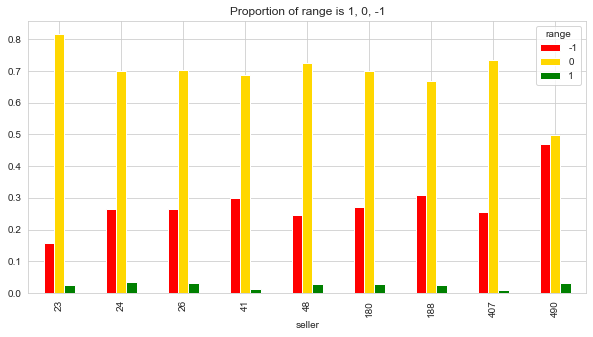

In [86]:
#bar plot of proportion of range is 1, 0, -1
#set white background
sns.set_style("whitegrid")
regular.groupby(['seller'])['range'].value_counts(normalize=True).unstack().plot.bar(figsize=(10, 5), title='Proportion of range is 1, 0, -1',color=['red', 'gold', 'green'])
plt.show()


In [87]:

## 6. Most product sold by every seller

sales = pd.read_csv('sales_data.csv')
sales.head(50)
products_sales = sales.groupby('product_id').sum()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
products_sales = products_sales.drop(['regular_price_tax','regular_price'], axis=1)
products_sales.reset_index(drop=False, inplace=True)
products_sales.sort_values(by='quantity',ascending=False, inplace=True)
products_sales.reset_index(inplace=True, drop=True)
avg_sales_price = products_sales['sales_price']/products_sales['quantity']
avg_purchase_price = products_sales['purchase_price']/products_sales['quantity']
avg_profit = avg_sales_price - avg_purchase_price
tot_profit = products_sales['sales_price'] - products_sales['purchase_price']
products_sales['avg_sales_price'], products_sales['avg_purchase_price'], products_sales['avg_profit'], products_sales['tot_profit'] = avg_sales_price,avg_purchase_price,avg_profit,tot_profit
products_sales['product_id'] = products_sales['product_id'].astype(str)
products_sales


,product_id,quantity,sales_price_tax,sales_price,purchase_price,avg_sales_price,avg_purchase_price,avg_profit,tot_profit
0,112582,649,2198477.50,1832056.00,1736537.64,2822.89,2675.71,147.18,95518.36
1,110853,646,462144.00,385122.50,338433.28,596.16,523.89,72.27,46689.22
2,157318,541,1040104.00,866701.50,731052.00,1602.04,1351.30,250.74,135649.50
3,125506,445,223908.50,186596.00,133620.99,419.32,300.27,119.04,52975.01
4,107645,441,362617.00,302130.50,253323.39,685.10,574.43,110.67,48807.11
...,...,...,...,...,...,...,...,...,...
7524,139933,4,164966.00,137473.00,130947.00,34368.25,32736.75,1631.50,6526.00
7525,139950,4,183960.00,153300.00,134880.00,38325.00,33720.00,4605.00,18420.00
7526,139967,4,8545.00,7120.00,5952.49,1780.00,1488.12,291.88,1167.51
7527,139984,4,6872.00,5728.00,8200.00,1432.00,2050.00,-618.00,-2472.00


In [88]:
somma = 0
for i in range(len(sales)):
    prod = sales['quantity'][i]*sales['sales_price_tax'][i]
    somma = somma + prod
print(somma)
fatturato_sales = somma


2396778864.5


In [89]:

#More purchased products

product50 = products_sales[:50]



116922227.87

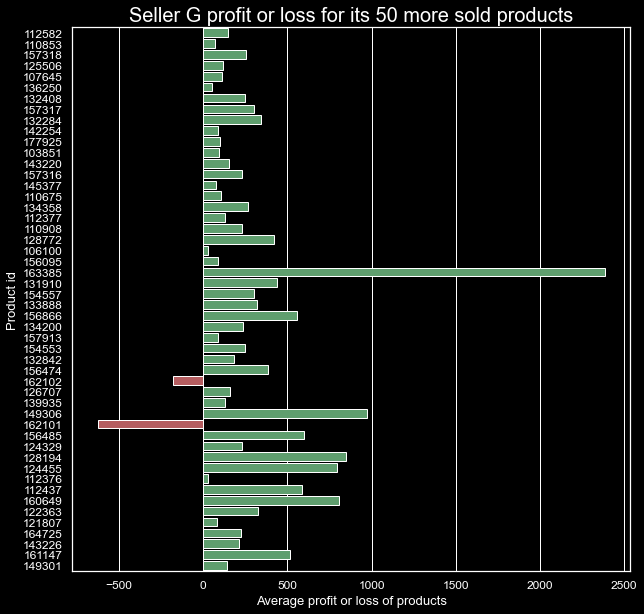

In [90]:

sns.set(rc={'figure.figsize':(10,10)})
plt.style.use("dark_background")
colors=[]
for i in product50['avg_profit']:
    if i >= 0:
        colors.append('g')
    else:
        colors.append('r')

sns.barplot(data=product50, x='avg_profit', y='product_id', palette=colors)
plt.title('Seller G profit or loss for its 50 more sold products', size=20)
plt.ylabel('Product id', size=13)
plt.xlabel('Average profit or loss of products', size = 13)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig('50_profit.png', transparent=True)
plt.savefig('clicks&prod.png', transparent=True)
round(sum(products_sales['tot_profit']),2)


In [91]:

### Sellers comparision
regular = pd.read_csv('clicks_regular.csv')
bidding = pd.read_csv('clicks_bidding.csv')
sellers = pd.read_csv('sellers_list.csv')
regbid = regular.append(bidding)
regbid.reset_index(drop=True, inplace=True)
sellers


,seller_id,seller_name
0,48,F
1,180,B
2,24,G
3,41,I
4,26,H
5,490,L
6,188,E
7,407,D
8,23,C


In [92]:
s48 = regbid[regbid['seller']==48]
s180 = regbid[regbid['seller']==180]
s24 = regbid[regbid['seller']==24]
s41 = regbid[regbid['seller']==41]
s26 = regbid[regbid['seller']==26]
s490 = regbid[regbid['seller']==490]
s188 = regbid[regbid['seller']==188]
s407 = regbid[regbid['seller']==407]
s23 = regbid[regbid['seller']==23]
s24_2021 = s24[s24['date']>='2021-01-01 00:00:00']
s24_2021 = s24_2021[s24_2021['date']<='2022-01-01 00:00:00']
s24_2021.reset_index(drop=True,inplace=True)


In [93]:

fatturato_clicks = s24_2021['price'].sum()
s24_group = s24_2021.groupby(by='product_id').sum()
s24_group.reset_index(drop=False,inplace=True)
s24_group.drop(['seller','position','price_min','price_max'],axis=1)
#qua devono essere fatte analisi sui prodotti venduti di ogni seller
### Conversion rates
sales


,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price
0,2021-01-02,109751,1,2499.00,2777.00,2082.00,2313.89,1499.40
1,2021-01-02,110853,1,3990.00,8322.00,3325.00,6935.19,2833.70
2,2021-01-02,131410,1,2288.00,3767.00,1907.00,3138.89,1860.00
3,2021-01-02,134294,1,4990.00,6666.00,4158.00,5554.63,3599.40
4,2021-01-02,134298,1,5990.00,7777.00,4992.00,6480.56,4199.40
...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.00,4433.00,2742.00,3694.44,2474.25
119121,2021-12-31,184647,1,1990.00,2878.00,1658.00,2398.15,1638.00
119122,2021-12-31,184749,1,4990.00,5544.00,4158.00,4620.37,3600.00
119123,2021-12-31,184809,1,2590.00,2878.00,2158.00,2398.15,1650.00


In [94]:
len_sales = 0
for i in sales['quantity']:
    len_sales = len_sales + i
print(len_sales)
s24_2021


165353


,date,seller,position,price_max,price_min,price,type,product_id
0,2021-01-01 00:00:57,24,NaN,46990.00,46990.00,NaN,Regular,157684
1,2021-01-01 00:02:29,24,NaN,9990.00,9590.00,NaN,Regular,155451
2,2021-01-01 00:10:55,24,NaN,5090.00,3399.00,NaN,Regular,131971
3,2021-01-01 00:17:24,24,NaN,32990.00,30690.00,NaN,Regular,157209
4,2021-01-01 00:19:36,24,NaN,4531.00,4531.00,NaN,Regular,157236
...,...,...,...,...,...,...,...,...
621723,2021-12-31 23:48:09,24,1.00,5699.00,4999.00,2590.00,Bidding,155409
621724,2021-12-31 23:48:38,24,1.00,5699.00,4999.00,2590.00,Bidding,155409
621725,2021-12-31 23:51:56,24,2.00,33590.00,27389.00,27991.00,Bidding,161911
621726,2021-12-31 23:52:37,24,2.00,27990.00,21968.00,25499.00,Bidding,165741


In [95]:
conv_rate_tot = len_sales/(len(s24_2021))
print(round(conv_rate_tot,3))
s24_2021['date'] = pd.to_datetime(s24_2021['date'])

s24_2021['date'] = s24_2021['date'].dt.date

s24_2021


0.266


,date,seller,position,price_max,price_min,price,type,product_id
0,2021-01-01,24,NaN,46990.00,46990.00,NaN,Regular,157684
1,2021-01-01,24,NaN,9990.00,9590.00,NaN,Regular,155451
2,2021-01-01,24,NaN,5090.00,3399.00,NaN,Regular,131971
3,2021-01-01,24,NaN,32990.00,30690.00,NaN,Regular,157209
4,2021-01-01,24,NaN,4531.00,4531.00,NaN,Regular,157236
...,...,...,...,...,...,...,...,...
621723,2021-12-31,24,1.00,5699.00,4999.00,2590.00,Bidding,155409
621724,2021-12-31,24,1.00,5699.00,4999.00,2590.00,Bidding,155409
621725,2021-12-31,24,2.00,33590.00,27389.00,27991.00,Bidding,161911
621726,2021-12-31,24,2.00,27990.00,21968.00,25499.00,Bidding,165741


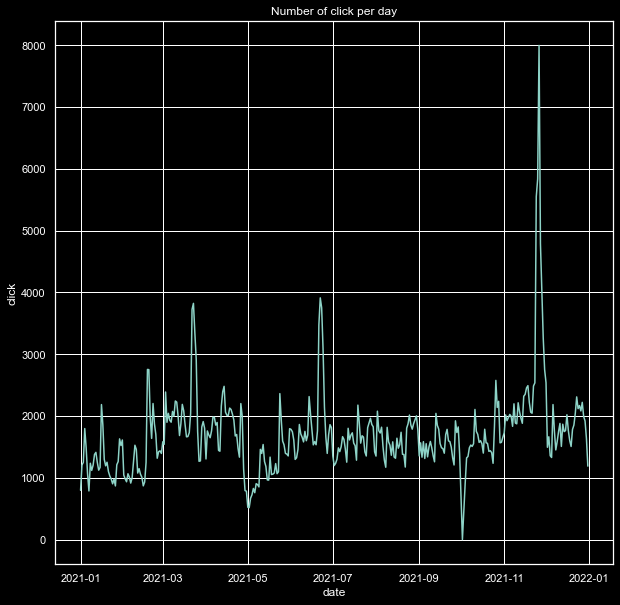

,seller_id,seller_name
0,48,F
1,180,B
2,24,G
3,41,I
4,26,H
5,490,L
6,188,E
7,407,D
8,23,C


In [96]:
s24_2021.sort_values(by='date', inplace=True)
s24_2021.reset_index(drop=True,inplace=True)
s24_2021['click'] = 1
click = s24_2021.groupby('date')['click'].sum()
click = pd.DataFrame(click)
click.reset_index(inplace=True)
click
sns.lineplot(data=click, x='date', y='click')
plt.title('Number of click per day')
plt.show()
purc = sales.groupby('sale_date')['quantity'].sum()
purc = pd.DataFrame(purc)
purc.reset_index(drop=False,inplace=True)
purc
purc['sale_date'] = pd.to_datetime(purc['sale_date'])
purc.rename({'sale_date':'date'}, axis=1,inplace=True)
seller_list = pd.read_csv('sellers_list.csv')
seller_list


Check the difference between clicks and products sold

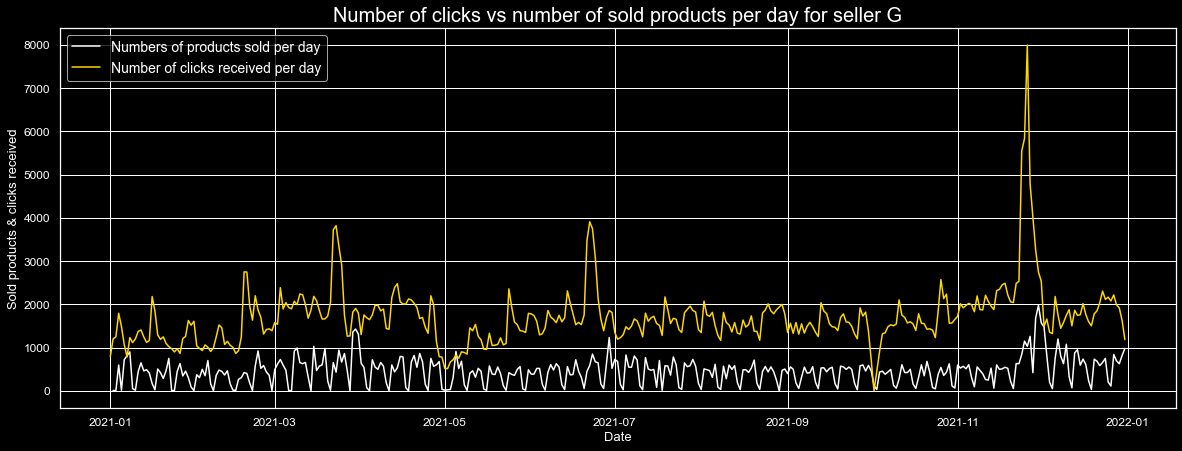

In [97]:

from matplotlib import rc

sns.set(rc={'figure.figsize':(20,7)})
plt.style.use("dark_background")
sns.lineplot(data=purc,x='date',y='quantity', color='white')
sns.lineplot(data=click, x='date', y='click',  color='gold')
plt.ylabel('Sold products & clicks received', size=13)
plt.xlabel('Date',size = 13)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Number of clicks vs number of sold products per day for seller G', size= 20, color='white')
leg = plt.legend(labels=['Numbers of products sold per day','Number of clicks received per day'],prop={'size': 14})
